<a href="https://colab.research.google.com/github/elhamod/BA820/blob/main/Hands-on/03-dimensionality-reduction/Synthetic_data_dim_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Course: BA820 - Unsupervised and Unstructured ML**

**Notebook created by: Mohannad Elhamod**

We are going to generate some synthetic data and get more acquainted with how PCA works.

# Creating The Data

In [55]:
from sklearn.datasets import make_blobs
import pandas as pd


X, _ = make_blobs(n_samples=100, centers=[[0, 0, 0]], n_features=3,  cluster_std = [[1,1.4,1]])
df = pd.DataFrame(X, columns=['x', 'y', 'z'])

X, _ = make_blobs(n_samples=2000, centers=[[3, 3, 3]], n_features=3,  cluster_std = [[1.4,1,1]])
df2 = pd.DataFrame(X, columns=['x', 'y', 'z'])

X, _ = make_blobs(n_samples=150, centers=[[5, 5, 5]], n_features=3,  cluster_std = [[0.7,1,0.7]])
df3 = pd.DataFrame(X, columns=['x', 'y', 'z'])


df_3d = pd.concat([df, df2, df3], axis=0)

In [56]:
import plotly.express as px

fig = px.scatter_3d(df_3d, x='x', y='y', z='z')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

# PCA

## Creating The Model

In [57]:
from sklearn.decomposition import PCA

# Create the model
model = PCA()

#fit the data
model.fit(df_3d)

PCA()

In [58]:
df_3d

,x,y,z
0,0.391628,-0.116871,-0.519987
1,0.030482,-0.820186,0.521822
2,-1.482709,-1.896988,-1.558175
3,-0.002120,-0.714061,-0.634287
4,0.638450,-0.228596,-1.510594
...,...,...,...
145,5.762274,4.462132,3.960182
146,4.885538,5.922514,4.488121
147,5.696122,5.423442,4.958611
148,4.246846,4.311249,3.805317


## Applying The Model

In [59]:
import pandas as pd

# transform data to the new space
transformed_data = model.transform(df_3d)

# create a df out of the transformed data
transformed_data_df = pd.DataFrame(transformed_data, columns = ['PC1', 'PC2', 'PC3'])
transformed_data_df

,PC1,PC2,PC3
0,-5.097253,1.667444,-0.440288
1,-5.227589,1.298384,0.807611
2,-7.835704,1.890923,0.018769
3,-5.734341,1.786154,-0.116616
4,-5.428559,2.382387,-1.098922
...,...,...,...
2245,3.189249,0.574200,-0.292861
2246,3.505544,-1.080470,-0.877776
2247,4.075433,-0.489826,-0.204095
2248,1.925820,-0.290076,-0.286108


Let's plot the transformed data

In [60]:
import plotly.express as px

fig = px.scatter_3d(transformed_data_df, x='PC1', y='PC2', z='PC3')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

What do you notice about the transformed data?

Let's look at the resulting components

In [61]:
components_df = pd.DataFrame(model.components_, index=['PC1', 'PC2', 'PC3'], columns = ['x', 'y', 'z'])
components_df

,x,y,z
PC1,0.737438,0.492034,0.462696
PC2,0.675297,-0.549969,-0.491435
PC3,-0.012666,-0.674860,0.737837


What do you think is the magnitude of each of these?

In [62]:
import numpy as np

components_df['magnitude'] = components_df.apply(lambda row: np.sqrt(np.sum(row**2)), axis=1)
components_df

,x,y,z,magnitude
PC1,0.737438,0.492034,0.462696,1.0
PC2,0.675297,-0.549969,-0.491435,1.0
PC3,-0.012666,-0.674860,0.737837,1.0


Let's plot the scaled version of these components by scaling them in proportion to their standard deviations. This is called the **loadings**.

In [63]:
loadings = components_df.drop('magnitude', axis=1).mul(np.sqrt(model.explained_variance_), axis=0)

loadings_df = pd.DataFrame(loadings, index=['PC1', 'PC2', 'PC3'], columns = ['x', 'y', 'z'])
loadings_df

,x,y,z
PC1,1.342015,0.895422,0.842031
PC2,0.821561,-0.669089,-0.597876
PC3,-0.012401,-0.660757,0.722418


Let's plot the loadings.

In [64]:
import plotly.express as px
import plotly.graph_objects as go


# Create a 3D scatter plot
fig = px.scatter_3d( #scatter_3d scatter
    transformed_data_df,
    x="PC1",  # First principal component
    y="PC2",  # Second principal component
    z="PC3",  # Third principal component
)

fig.update_traces(
    marker=dict(
        size=2,  # Smaller marker size
        opacity=0.3  # Transparency (alpha)
    )
)


# Add an arrow for each original dimensions
for i, feature in enumerate(loadings_df.columns):
    fig.add_trace(
        go.Scatter3d(
            x=[0, loadings_df.loc["PC1", feature]],
            y=[0, loadings_df.loc["PC2", feature]],
            z=[0, loadings_df.loc["PC3", feature]],
            mode="lines",
            line=dict(color="red", width=3),
            showlegend=False,
        )
    )
    fig.add_trace(
        go.Scatter3d(
            x=[loadings_df.loc["PC1", feature]],
            y=[loadings_df.loc["PC2", feature]],
            z=[loadings_df.loc["PC3", feature]],
            mode="text",
            showlegend=False,
            text=[f"<b>{feature}</b>"],  # Bold text for better readability
            textfont=dict(size=12, color="red"),  # Match text color to the line
            textposition="middle right",  # Position the text more naturally
        )
    )


# Show the plot
fig.show()

###Scree Plot

In [65]:
!pip install psynlig

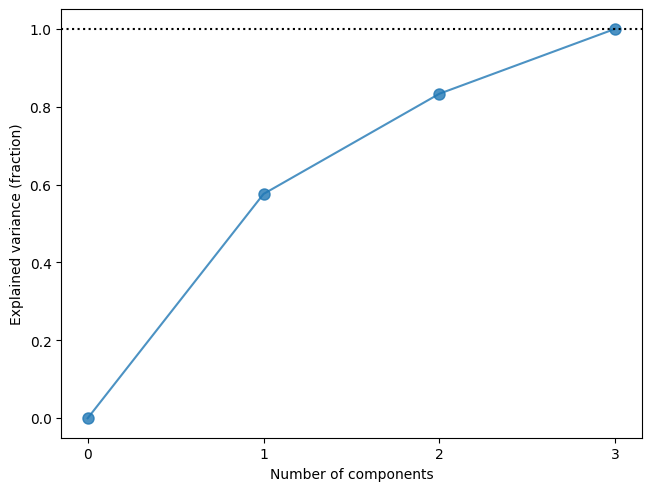

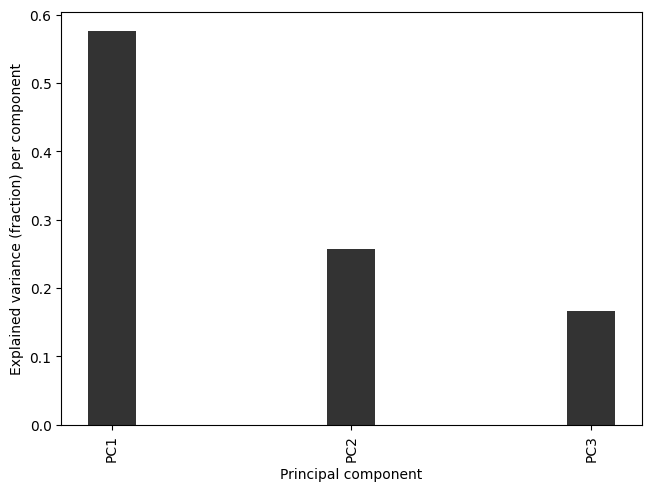

In [66]:
from matplotlib import pyplot as plt
from psynlig import (
    pca_explained_variance,
    pca_explained_variance_bar,
)

_, ax = pca_explained_variance(model,  marker='o', markersize=8, alpha=0.8)

plt.show()

pca_explained_variance_bar(
    model,
    width=0.2,
    alpha=0.8,
    color='black',
)

plt.show()

## Projecting to a space of lower dimensionality.

Let's use  a 2D PCA instead of 3D

In [67]:
# Create the model
model = PCA(2)

#fit the data
model.fit(df_3d)
transformed_data = model.transform(df_3d)

Let's plot the projection

In [68]:
transformed_data_df = pd.DataFrame(transformed_data, columns=['PC1', 'PC2'])

fig = px.scatter(transformed_data_df, x='PC1', y='PC2')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)


fig.show()

### Reconstructing the Data

In [69]:
reconstruced_data = model.inverse_transform(transformed_data_df.to_numpy())
reconstruced_data_df = pd.DataFrame(reconstruced_data, columns = ['x', 'y', 'z'])

In [70]:
fig = px.scatter_3d(reconstruced_data_df, x='x', y='y', z='z')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)

fig.show()

**Question:** Can you explain what you are seeing?

#Questions

1. Can you plot the boxplots that show the variance of the data along each PC?
2. Try different blob sizes and densities and analyze the effects of these factors.